Based on passenger details from the popular titanic that sunk on it's maiden voyage. This project predicts the passenger that survived based on available data. The data set has already been splitted into a training and test set. The goal is to train a suitable algorithm on the training set and use it to predict the survival of passengers in the test set.

NB: Some of the codes were sourced from Aurelien Geron's Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow. 

python function to read csv files

In [1]:
def readFile(fileName):
    file = pd.read_csv(fileName)
    return file

Loading and Exploring the data set

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic = readFile('train.csv')

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The data is self explanatory apart from SibSp indicating how many siblings & spouses and Parcho which indicates how many children & parents were onboard the Titanic.

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Only 38% of the passengers survived the trip

In [6]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C=Cherbourg, Q=Queenstown, S=Southampton.
Representative of the different places Titanic picked up passengers.

In [8]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin and Embarked columns have missing data. The Cabin column will be ignored during data preprocessing while the age and embarked will be filled up with the mean and common occurence respectively. Name also will be ignored as hot encoding such volume may cause problems.

In [12]:
titanicCorr = titanic.corr()
titanicCorr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

The higher the fare, the greater the chance of survival and the lower the passenger class, the lower the chance of survival. This shows that the wealthy class were given more spaces in the life boats than the poor class. Feature engineering will be carried out to find out if it'll have a more significant impact on the chance of survival.

In [13]:
titanic['Relatives'] = titanic['SibSp'] + titanic['Parch']
titanic['Age Bracket'] = titanic['Age'] // 15 * 15

In [14]:
titanicCorr = titanic.corr()
titanicCorr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
Relatives      0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age Bracket   -0.058848
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Data Processing and Pipeline Construction for ML Algorithms

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class dataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attributeNames):
        self.attributeNames = attributeNames
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attributeNames]

This class selects only the desired columns for data transformation.

In [16]:
class mostFrequentImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.mostFrequent = pd.Series(
            [X[c].value_counts().index[0] for c in X], index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.mostFrequent)

This class fills the empty non integer column spaces with the most frequent attribute.

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:
yTrain = titanic['Survived'].copy()
yTrain

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
XTrain = titanic.drop(['Survived'], axis=1)
XTrain

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Age Bracket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,15.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,30.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,15.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,30.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,15.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,15.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,NaN
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,15.0


In [20]:
catPipeline = Pipeline([
    ('cat', dataFrameSelector(['Sex', 'Embarked'])),
    ('imputer', mostFrequentImputer()),
    ('encoder', OneHotEncoder(sparse=False))
])

In [21]:
catPipeline.fit_transform(titanic)

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [22]:
numPipeline = Pipeline([
    ('num', dataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare',
                               'Pclass', 'Age Bracket', 'Relatives'])),
    ('imputer', SimpleImputer(strategy='median')),
    ('stdScaler', StandardScaler())
])

In [23]:
numPipeline.fit_transform(titanic)

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.82737724,
        -0.49336646,  0.05915988],
       [ 0.66386103,  0.43279337, -0.47367361, ..., -1.56610693,
         0.62234298,  0.05915988],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.82737724,
        -0.49336646, -0.56097483],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.82737724,
        -0.49336646,  1.29942929],
       [-0.25833709, -0.4745452 , -0.47367361, ..., -1.56610693,
        -0.49336646, -0.56097483],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.82737724,
         0.62234298, -0.56097483]])

In [24]:
fullPipeline = FeatureUnion(transformer_list=[
    ('numPipeline', numPipeline),
    ('catPipeline', catPipeline)
])

In [25]:
XTrain = fullPipeline.fit_transform(XTrain)
XTrain

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [26]:
XTrainTr = pd.DataFrame(XTrain)
XTrainTr

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.565736,0.432793,-0.473674,-0.502445,0.827377,-0.493366,0.059160,0.0,1.0,0.0,0.0,1.0
1,0.663861,0.432793,-0.473674,0.786845,-1.566107,0.622343,0.059160,1.0,0.0,1.0,0.0,0.0
2,-0.258337,-0.474545,-0.473674,-0.488854,0.827377,-0.493366,-0.560975,1.0,0.0,0.0,0.0,1.0
3,0.433312,0.432793,-0.473674,0.420730,-1.566107,0.622343,0.059160,1.0,0.0,0.0,0.0,1.0
4,0.433312,-0.474545,-0.473674,-0.486337,0.827377,0.622343,-0.560975,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,-0.386671,-0.369365,-0.493366,-0.560975,0.0,1.0,0.0,0.0,1.0
887,-0.796286,-0.474545,-0.473674,-0.044381,-1.566107,-0.493366,-0.560975,1.0,0.0,0.0,0.0,1.0
888,-0.104637,0.432793,2.008933,-0.176263,0.827377,-0.493366,1.299429,1.0,0.0,0.0,0.0,1.0
889,-0.258337,-0.474545,-0.473674,-0.044381,-1.566107,-0.493366,-0.560975,0.0,1.0,1.0,0.0,0.0


Loading, Data Processing and Feature Engineering of the Test Set for ML Algorithms

In [27]:
test = readFile('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
test['Relatives'] = test['SibSp'] + test['Parch']
test['Age Bracket'] = test['Age'] // 15 * 15

In [29]:
XTest = fullPipeline.transform(test)
XTest

array([[ 0.39488658, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.35550962,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.50825727, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.70228595, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1046374 , -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1046374 ,  0.43279337,  0.76762988, ...,  1.        ,
         0.        ,  0.        ]])

In [30]:
XTestTr = pd.DataFrame(XTest)
XTestTr

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.394887,-0.474545,-0.473674,-0.490783,0.827377,0.622343,-0.560975,0.0,1.0,0.0,1.0,0.0
1,1.355510,0.432793,-0.473674,-0.507479,0.827377,1.738052,0.059160,1.0,0.0,0.0,0.0,1.0
2,2.508257,-0.474545,-0.473674,-0.453367,-0.369365,2.853762,-0.560975,0.0,1.0,0.0,1.0,0.0
3,-0.181487,-0.474545,-0.473674,-0.474005,0.827377,-0.493366,-0.560975,0.0,1.0,0.0,0.0,1.0
4,-0.565736,0.432793,0.767630,-0.401017,0.827377,-0.493366,0.679295,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.104637,-0.474545,-0.473674,-0.486337,0.827377,-0.493366,-0.560975,0.0,1.0,0.0,0.0,1.0
414,0.740711,-0.474545,-0.473674,1.544246,-1.566107,0.622343,-0.560975,1.0,0.0,1.0,0.0,0.0
415,0.702286,-0.474545,-0.473674,-0.502445,0.827377,0.622343,-0.560975,0.0,1.0,0.0,0.0,1.0
416,-0.104637,-0.474545,-0.473674,-0.486337,0.827377,-0.493366,-0.560975,0.0,1.0,0.0,0.0,1.0


Training and Testing Models

Python Function to ascertain the cross validation score, precision score, recall score and confusion matrix of the models

In [31]:
def score(model):
    model.fit(XTrain, yTrain)
    cvs = cross_val_score(model, XTrain, yTrain, cv=10)
    yTrainPred = cross_val_predict(model, XTrain, yTrain, cv=3)
    confusionMatrix = confusion_matrix(yTrain, yTrainPred)
    precisionScore = precision_score(yTrain, yTrainPred)
    recallScore = recall_score(yTrain, yTrainPred)
    total = print('cvs:', cvs.mean(), ' ps:', precisionScore, ' rs:', recallScore,
                 ' cm:', confusionMatrix)
    return total

Python Function to showcase the recall, precision trade off

In [32]:
def plot(model):
    yTrainPred = cross_val_predict(model, XTrain, yTrain, cv=3)
    precisionScore = precision_score(yTrain, yTrainPred)
    recallScore = recall_score(yTrain, yTrainPred)
    yScores = cross_val_predict(model, XTrain, yTrain, cv=3, method='decision_function')
    precisions, recalls, thresholds = precision_recall_curve(yTrain, yScores)
    
    plt.style.use('ggplot')
    fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10));
    plot = ax0.plot(thresholds, recalls[:-1], 'b--', label='Recall', linewidth=2);
    ax0.plot(thresholds, precisions[:-1], 'g-', label='Precisions', linewidth=2);
    ax0.set(title='Precision, Recall vs Threshold', xlabel='Threshold',
           ylabel='Precision/Recall');
    ax0.legend(title='Plot');
    
    plot = ax1.plot(recalls, precisions, linewidth=2);
    ax1.set(title='Precison vs Recall', xlabel='Recall', ylabel='Precision');
    
    fig.suptitle('Precision-Recall Trade Off', fontsize=16, fontweight='bold');
    
    fig.savefig(f'../Titanic Competition/{model}.png')

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
sgdClf = SGDClassifier(random_state=42)

In [36]:
score(sgdClf)

cvs: 0.7901498127340825  ps: 0.7045454545454546  rs: 0.7251461988304093  cm: [[445 104]
 [ 94 248]]


Stochastic Gradient Descent Classifier model as an accuracy score of 79%

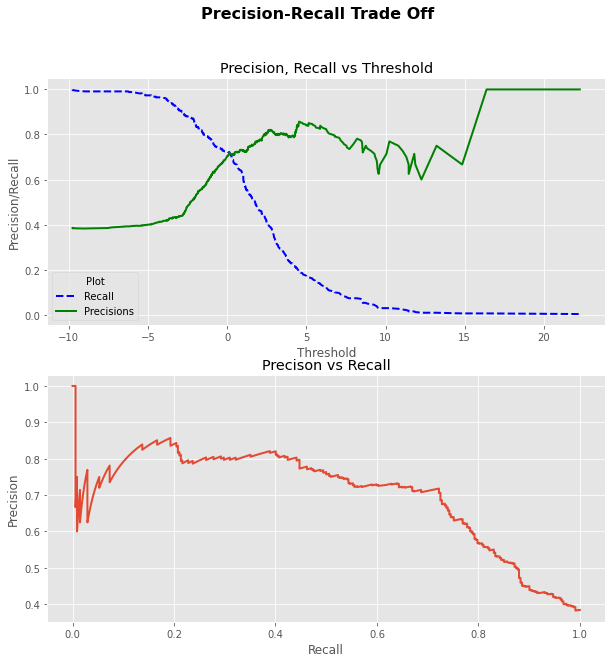

In [37]:
plot(sgdClf)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
forestClf = RandomForestClassifier(random_state=42, n_estimators=100)

In [40]:
score(forestClf)

cvs: 0.8070411985018726  ps: 0.7379518072289156  rs: 0.716374269005848  cm: [[462  87]
 [ 97 245]]


Random Forest Classifier has an accuracy score of 80%

In [41]:
from sklearn.svm import SVC
svClf = SVC()

In [42]:
score(svClf)

cvs: 0.8271785268414481  ps: 0.8104575163398693  rs: 0.7251461988304093  cm: [[491  58]
 [ 94 248]]


Support Vector Machine has an accuracy score of 82%. The highest so far.

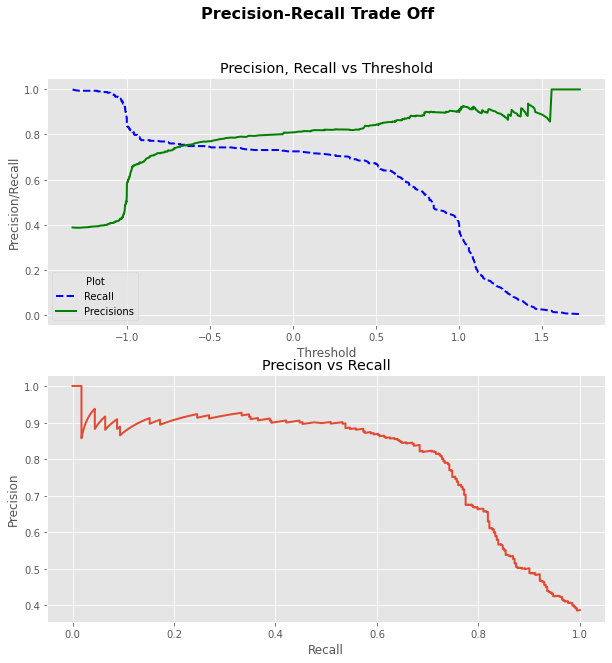

In [43]:
plot(svClf)

In [44]:
from sklearn.naive_bayes import GaussianNB
bayesClf = GaussianNB()

In [45]:
score(bayesClf)

cvs: 0.7935330836454431  ps: 0.7245508982035929  rs: 0.7076023391812866  cm: [[457  92]
 [100 242]]


Bayes Classifier has an accuracy score of 79%.

Graphical demonstration of different model accuracy

In [46]:
svClfScores = cross_val_score(svClf, XTrain, yTrain, cv=10)
forestClfScores = cross_val_score(forestClf, XTrain, yTrain, cv=10)
sgdClfScores = cross_val_score(sgdClf, XTrain, yTrain, cv=10)
bayesClfScores = cross_val_score(bayesClf, XTrain, yTrain, cv=10)

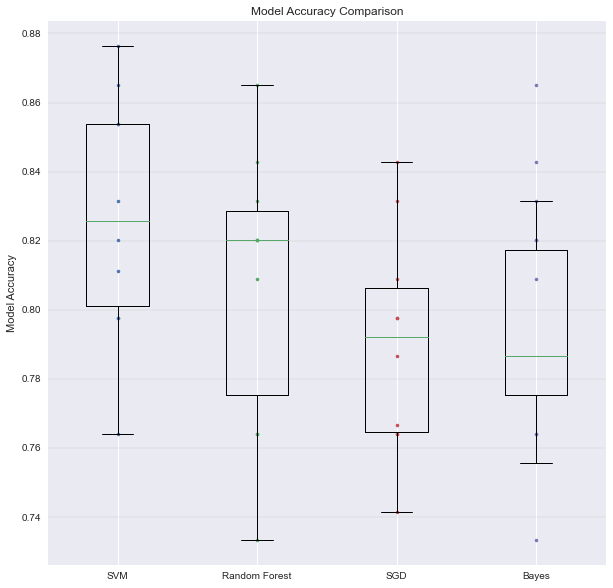

In [47]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,10));
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.plot([1]*10, svClfScores, ".")
ax.plot([2]*10, forestClfScores, ".")
ax.plot([3]*10, sgdClfScores, ".")
ax.plot([4]*10, forestClfScores, ".")
ax.boxplot([svClfScores, forestClfScores, sgdClfScores, bayesClfScores],
           labels=('SVM','Random Forest', 'SGD', 'Bayes'))
ax.set(ylabel="Model Accuracy", title='Model Accuracy Comparison')
fig.savefig('../Titanic Competition/Model Comparison.png')

Hypertuning SVM Model with Grid Search

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
paramGrid = [
    {'C': [0.1, 1, 10, 100, 1000]},
    {'gamma': [1, 0.1, 0.01, 0.0001]},
    {'kernel': ['rbf']}
]

In [50]:
gridSearch = GridSearchCV(svClf, paramGrid, cv=5, scoring = 'neg_mean_squared_error',
                         return_train_score = True)

In [51]:
gridSearch.fit(XTrain, yTrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000]},
                         {'gamma': [1, 0.1, 0.01, 0.0001]},
                         {'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
model = gridSearch.best_estimator_

In [53]:
score(model)

cvs: 0.8271785268414481  ps: 0.8104575163398693  rs: 0.7251461988304093  cm: [[491  58]
 [ 94 248]]


The hypertuned model's accuracy is the same as the model tested earlier

In [54]:
predictions = model.predict(XTest)

In [55]:
titanicPredict = pd.DataFrame(predictions, columns=['Survived'])

In [56]:
testId = test['PassengerId']
testId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [57]:
testId = pd.DataFrame(testId, columns=['PassengerId'])
testId

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [58]:
titanicP = pd.concat([testId, titanicPredict], axis=1)

In [59]:
titanicP.to_csv('titanic_predictions.csv', index=False)